In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ВАРИАНТ 1 (МНОГО РАЗНЫХ ВАРИАНТОВ)

In [107]:
# Загрузка Excel-файла (путь укажите в соответствии с вашим расположением файла)
file_path = '/Users/danilalipatov/PycharmProjects/diploma/witn_new_rat_ag_num_cat_catnum_cb.xlsx'
df = pd.read_excel(file_path)


In [108]:
# Отбор необходимых столбцов
df = df[['identifier', 'rating_num_cb', '_date', 'agency', '_ro_type']]
df = df[(df["agency"] == "Expert RA") & (df["_ro_type"] == "CBNK - кредитная организация")]
# Приведение столбца _date к типу datetime
df['_date'] = pd.to_datetime(df['_date'])

# Если для одной компании на одну дату имеется более одного значения,
# агрегируем их (например, берем среднее значение рейтинга)
df_agg = df.groupby(['identifier', '_date']).agg({
    'rating_num_cb': 'mean'
}).reset_index()

In [109]:
pivot_df = df_agg.pivot(index='_date', columns='identifier', values='rating_num_cb')

# Вычисление кросс корреляционной матрицы по коэффициенту Спирмена
corr_matrix = pivot_df.corr(method='spearman')

# Вывод матрицы в консоль
print("Кросс корреляционная матрица (Spearman):")
print(corr_matrix)

Кросс корреляционная матрица (Spearman):
identifier  106000547   274062111   276016368   411006129   541012405   \
identifier                                                               
106000547          1.0         NaN         NaN         NaN         NaN   
274062111          NaN         NaN         NaN         NaN         NaN   
276016368          NaN         NaN         1.0         NaN         NaN   
411006129          NaN         NaN         NaN         NaN         NaN   
541012405          NaN         NaN         NaN         NaN         1.0   
...                ...         ...         ...         ...         ...   
7835905108         NaN         NaN         NaN         NaN         NaN   
8602190258         NaN         NaN         NaN         NaN         NaN   
8622002375         NaN         NaN         NaN         NaN         NaN   
9703077050         NaN         NaN         NaN         NaN         NaN   
9721194461         NaN         NaN         NaN         NaN         NaN 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


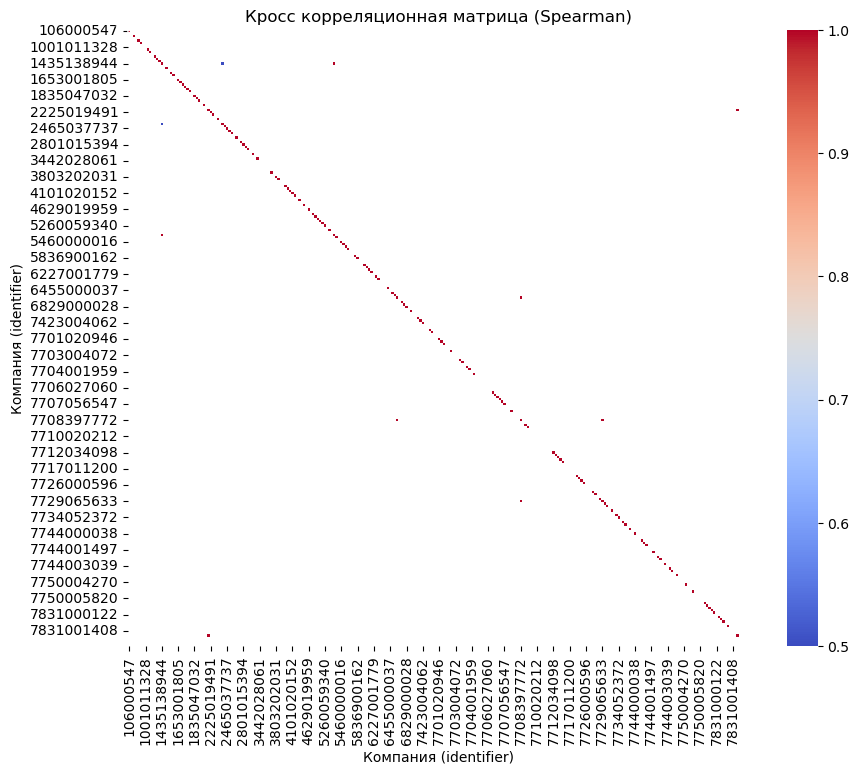

In [110]:
# Визуализация матрицы с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кросс корреляционная матрица (Spearman)")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()

In [111]:
pivot_df = df_agg.pivot(index='_date', columns='identifier', values='rating_num_cb')

# Убедимся, что индекс отсортирован по дате (важно для time-интерполяции)
pivot_df.sort_index(inplace=True)

# Выполняем интерполяцию пропущенных значений
# 'time' — подходит, если индекс является типом datetime
# можно заменить на 'linear' при необходимости
pivot_df_interpolated = pivot_df.interpolate(method='time')

# Теперь считаем кросс корреляционную матрицу (Spearman)
corr_matrix = pivot_df_interpolated.corr(method='spearman')

print("Кросс корреляционная матрица (Spearman) с интерполяцией:")
print(corr_matrix)

Кросс корреляционная матрица (Spearman) с интерполяцией:
identifier  106000547   274062111   276016368   411006129   541012405   \
identifier                                                               
106000547     1.000000         NaN    0.955320         NaN    0.143188   
274062111          NaN         NaN         NaN         NaN         NaN   
276016368     0.955320         NaN    1.000000         NaN    0.395378   
411006129          NaN         NaN         NaN         NaN         NaN   
541012405     0.143188         NaN    0.395378         NaN    1.000000   
...                ...         ...         ...         ...         ...   
7835905108    0.653817         NaN    0.725084         NaN    0.665766   
8602190258         NaN         NaN         NaN         NaN         NaN   
8622002375         NaN         NaN         NaN         NaN         NaN   
9703077050         NaN         NaN         NaN         NaN         NaN   
9721194461         NaN         NaN         NaN         

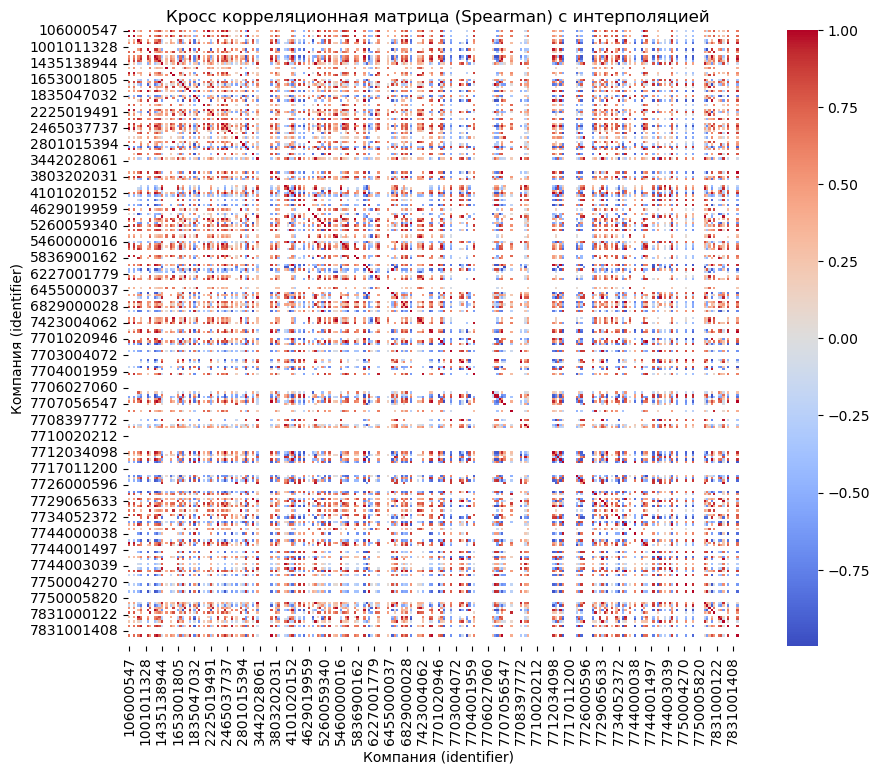

In [112]:
# Построим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Кросс корреляционная матрица (Spearman) c интерполяцией")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()

In [113]:
df_agg = df.groupby(['identifier', '_date']).agg({
    'rating_num_cb': 'mean',
}).reset_index()

# Pivot: строки — дата, столбцы — компания, значения — рейтинг
pivot_df = df_agg.pivot(index='_date', columns='identifier', values='rating_num_cb')
pivot_df.sort_index(inplace=True)

# 1. Ресемплинг (пример для дневной частоты 'D', 
#    если же данные ежемесячные, можно использовать 'M')
pivot_df = pivot_df.resample('D').asfreq()

# 2. Интерполяция по времени
pivot_df = pivot_df.interpolate(method='time')

# 3. Дополнительно прямой (forward fill) и обратной (backward fill) заливкой
pivot_df = pivot_df.fillna(method='ffill')
pivot_df = pivot_df.fillna(method='bfill')

# Теперь рассчитываем корреляцию (Spearman)
corr_matrix = pivot_df.corr(method='spearman')

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_46148/2005101847.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill')
/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_46148/2005101847.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='bfill')


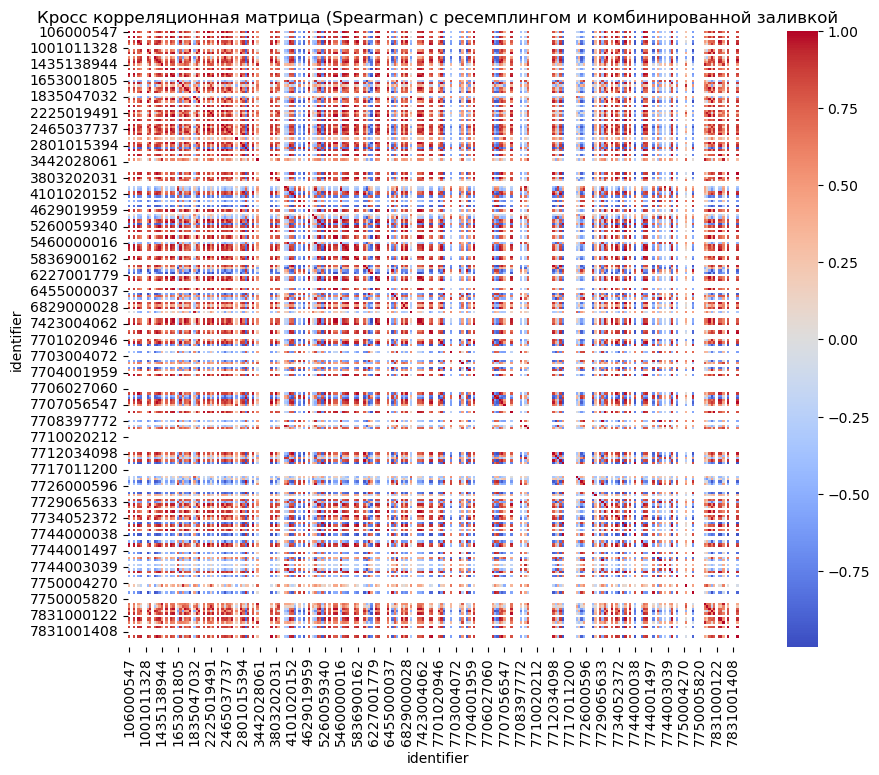

In [114]:
# Отображаем
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Кросс корреляционная матрица (Spearman) с ресемплингом и комбинированной заливкой")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


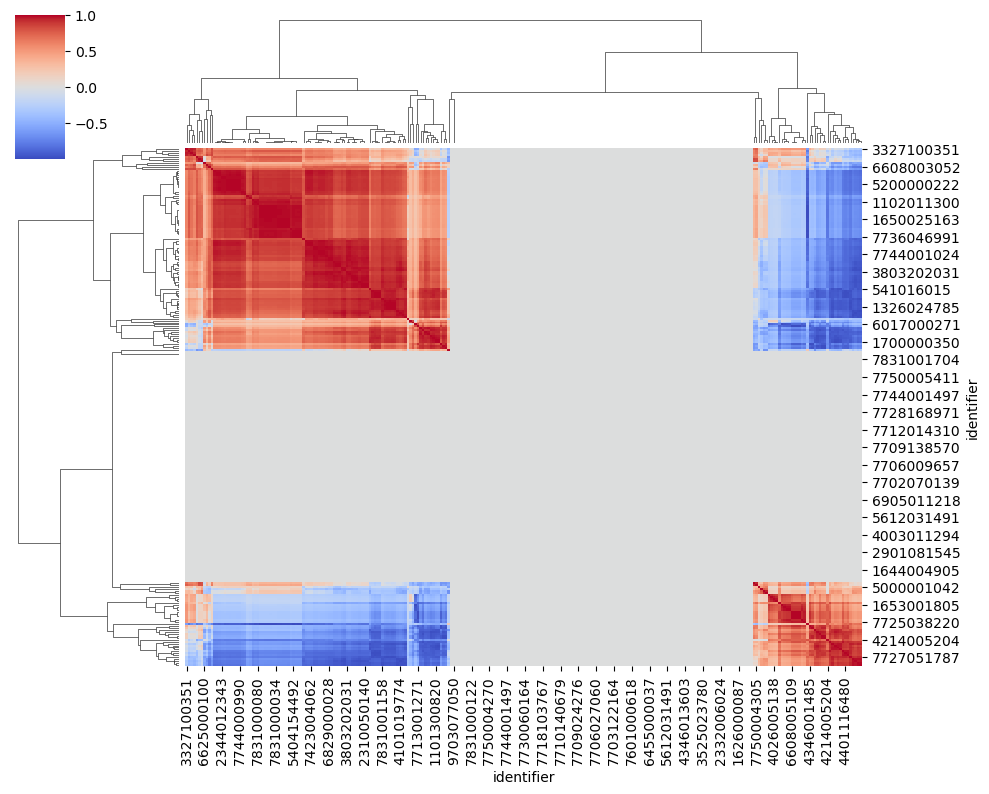

In [115]:
sns.clustermap(corr_matrix.fillna(0), cmap='coolwarm', figsize=(10, 8))
plt.show()

In [119]:
# Шаг 4. Pivot: строки — дата, столбцы — компания (identifier), значения — рейтинг (rating_num_cb)
pivot_df = df_agg.pivot(index='_date', columns='identifier', values='rating_num_cb')

# Упорядочим строки по дате
pivot_df.sort_index(inplace=True)

# Шаг 5. Ресемплинг по дням (создаём «сплошную» временную шкалу)
pivot_df = pivot_df.resample('D').asfreq()

# Шаг 6. Заполнение пропусков рейтингом «слева» (forward fill, ffill)
pivot_df = pivot_df.fillna(method='ffill')

# Шаг 7. Расчёт кросс корреляционной матрицы (Spearman)
corr_matrix = pivot_df.corr(method='spearman')

print("Кросс корреляционная матрица (Spearman) с заполнением пропусков слева (ffill):")
print(corr_matrix)

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_46148/2657279178.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill')


Кросс корреляционная матрица (Spearman) с заполнением пропусков слева (ffill):
identifier  106000547   274062111   276016368   411006129   541012405   \
identifier                                                               
106000547     1.000000         NaN    0.923693         NaN    0.082769   
274062111          NaN         NaN         NaN         NaN         NaN   
276016368     0.923693         NaN    1.000000         NaN    0.422060   
411006129          NaN         NaN         NaN         NaN         NaN   
541012405     0.082769         NaN    0.422060         NaN    1.000000   
...                ...         ...         ...         ...         ...   
7835905108    0.620517         NaN    0.697685         NaN    0.588828   
8602190258         NaN         NaN         NaN         NaN         NaN   
8622002375         NaN         NaN         NaN         NaN         NaN   
9703077050         NaN         NaN         NaN         NaN         NaN   
9721194461         NaN         Na

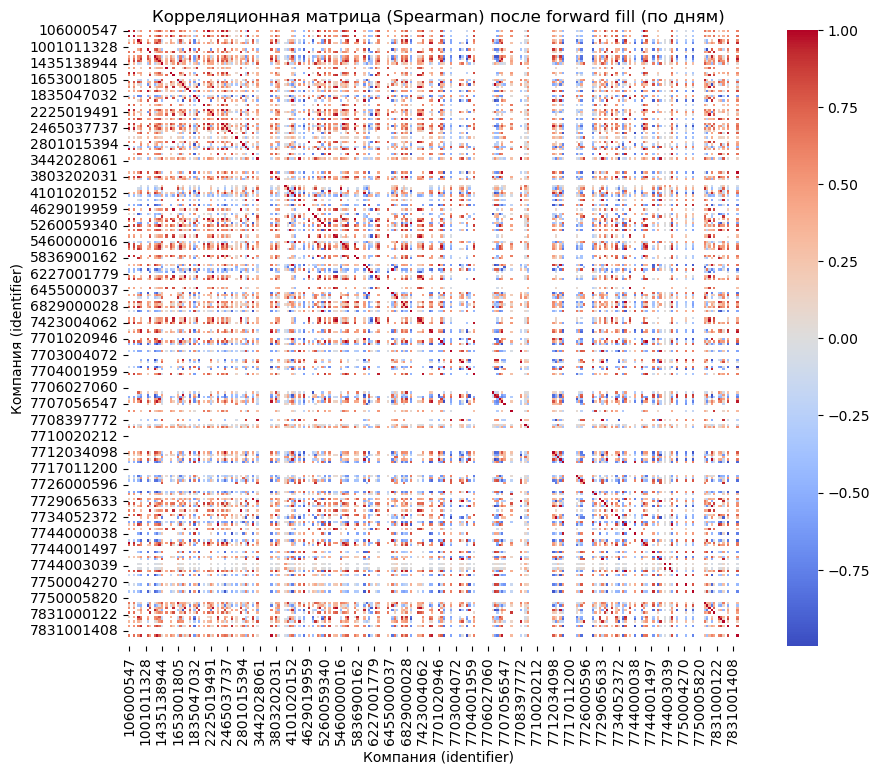

In [120]:
# Шаг 8. Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Корреляционная матрица (Spearman) после forward fill (по дням)")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()

Для 10 и более наблюдений: 

In [122]:
df_agg = df.groupby(['identifier', '_date']).agg({
    'rating_num_cb': 'mean',
    'agency': 'first',
    '_ro_type': 'first'
}).reset_index()
# Шаг 4. Выбираем только компании, у которых >= 10 наблюдений
counts = df_agg.groupby('identifier').size()
valid_companies = counts[counts >= 10].index  # компании, где число строк >= 10
df_agg = df_agg[df_agg['identifier'].isin(valid_companies)]

# Шаг 5. Формируем сводную таблицу (pivot)
pivot_df = df_agg.pivot(index='_date', columns='identifier', values='rating_num_cb')

# Упорядочиваем строки по дате
pivot_df.sort_index(inplace=True)

# Шаг 6. Ресемплинг по дням (создаём «сплошную» временную шкалу)
pivot_df = pivot_df.resample('D').asfreq()

# Шаг 7. Заполнение пропусков методом forward fill (значением слева)
pivot_df = pivot_df.fillna(method='ffill')

# Шаг 8. Расчёт кросс корреляционной матрицы (Spearman)
corr_matrix = pivot_df.corr(method='spearman')

print("Кросс корреляционная матрица (Spearman) для компаний с >=10 наблюдениями:")
print(corr_matrix)

Кросс корреляционная матрица (Spearman) для компаний с >=10 наблюдениями:
identifier  541016015   1435138944  1835047032  2634028786  3327100351  \
identifier                                                               
541016015     1.000000    0.009471   -0.714482         NaN    0.023384   
1435138944    0.009471    1.000000    0.231498         NaN    0.773631   
1835047032   -0.714482    0.231498    1.000000         NaN    0.095026   
2634028786         NaN         NaN         NaN         NaN         NaN   
3327100351    0.023384    0.773631    0.095026         NaN    1.000000   
3525023780         NaN         NaN         NaN         NaN         NaN   
3803202031    0.692148    0.200153   -0.555495         NaN    0.282139   
3906098008   -0.169742    0.364689    0.057164         NaN    0.361505   
4214005204   -0.362111    0.409759    0.120345         NaN    0.332790   
4401116480   -0.737173    0.313590    0.646554         NaN    0.225554   
5200000222    0.497451    0.393846   -

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_46148/1245618373.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill')


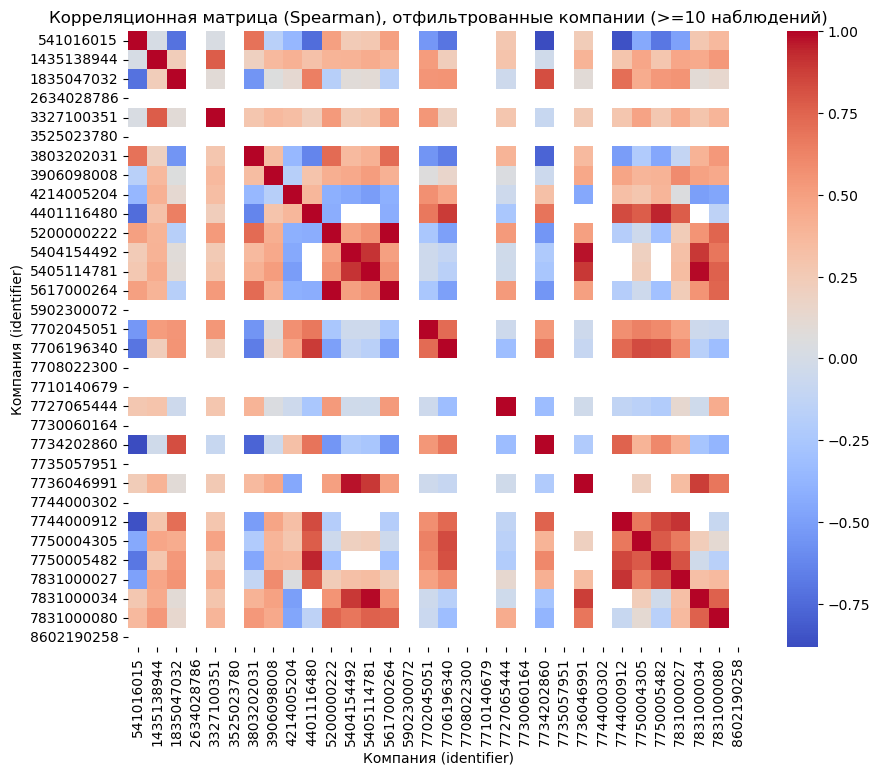

In [123]:
# Построим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Корреляционная матрица (Spearman), отфильтрованные компании (>=10 наблюдений)")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()

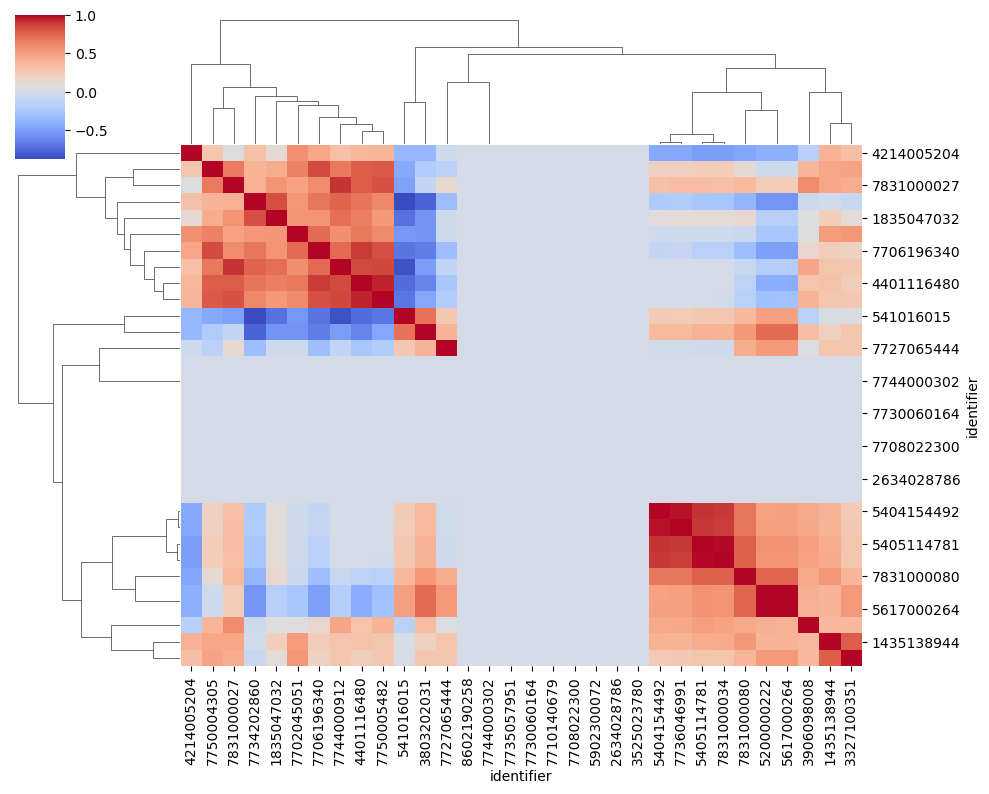

In [125]:

sns.clustermap(corr_matrix.fillna(0), cmap='coolwarm', figsize=(10, 8))
plt.show()

Рассмотрим ровно для 10 наблюдений:

In [137]:
df_agg = df.groupby(['identifier', '_date']).agg({
    'rating_num_cb': 'mean',
    'agency': 'first',
    '_ro_type': 'first'
}).reset_index()
# Шаг 4. Выбираем только компании, у которых >= 10 наблюдений
counts = df_agg.groupby('identifier').size()
valid_companies = counts[counts == 10].index  # компании, где число строк >= 10
df_agg = df_agg[df_agg['identifier'].isin(valid_companies)]

# Шаг 5. Формируем сводную таблицу (pivot)
pivot_df = df_agg.pivot(index='_date', columns='identifier', values='rating_num_cb')

# Упорядочиваем строки по дате
pivot_df.sort_index(inplace=True)

# Шаг 6. Ресемплинг по дням (создаём «сплошную» временную шкалу)
pivot_df = pivot_df.resample('D').asfreq()

# Шаг 7. Заполнение пропусков методом forward fill (значением слева)
pivot_df = pivot_df.fillna(method='ffill')

# Шаг 8. Расчёт кросс корреляционной матрицы (Spearman)
corr_matrix = pivot_df.corr(method='spearman')

print("Кросс корреляционная матрица (Spearman) для компаний с >=10 наблюдениями:")
print(corr_matrix)

Кросс корреляционная матрица (Spearman) для компаний с >=10 наблюдениями:
identifier  2634028786  3327100351  3525023780  4214005204  5200000222  \
identifier                                                               
2634028786         NaN         NaN         NaN         NaN         NaN   
3327100351         NaN    1.000000         NaN    0.327124    0.526378   
3525023780         NaN         NaN         NaN         NaN         NaN   
4214005204         NaN    0.327124         NaN    1.000000   -0.405242   
5200000222         NaN    0.526378         NaN   -0.405242    1.000000   
5404154492         NaN    0.254484         NaN   -0.446831    0.492624   
5405114781         NaN    0.295278         NaN   -0.515043    0.564208   
5617000264         NaN    0.525490         NaN   -0.405520    0.998398   
7706196340         NaN    0.192804         NaN    0.462142   -0.498795   
7710140679         NaN         NaN         NaN         NaN         NaN   
7730060164         NaN         NaN    

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_46148/3460703216.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill')


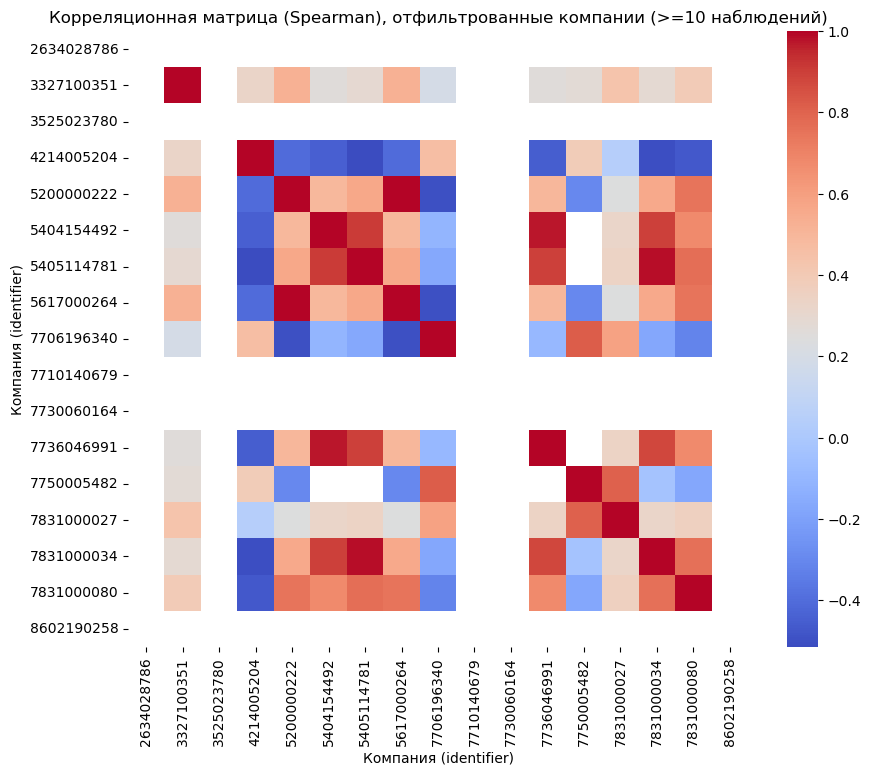

In [139]:
# Построим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Корреляционная матрица (Spearman), отфильтрованные компании (>=10 наблюдений)")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()

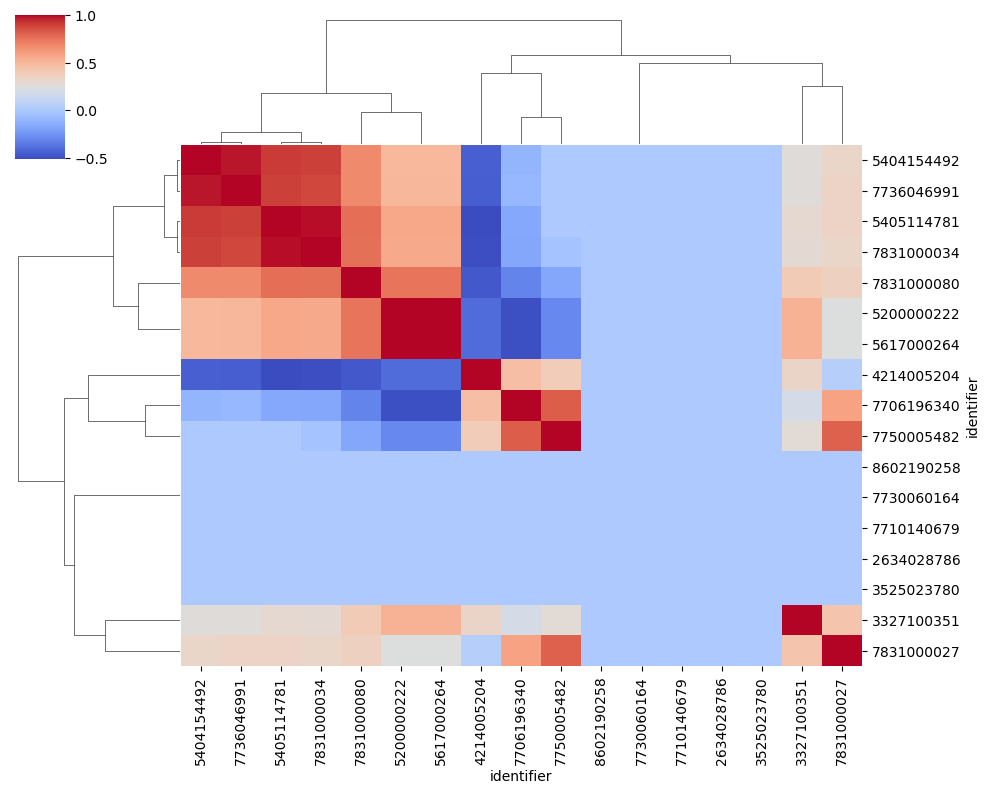

In [143]:
sns.clustermap(corr_matrix.fillna(0), cmap='coolwarm', figsize=(10, 8))
plt.show()

Рассмотрим без дат

In [146]:
# Шаг 2. Агрегируем данные, если на одну дату для компании приходится несколько значений (берём среднее)
df_agg = df.groupby(['identifier', '_date']).agg({
    'rating_num_cb': 'mean',
    'agency': 'first',
    '_ro_type': 'first'
}).reset_index()

# Шаг 3. Отфильтровываем компании с минимум 10 наблюдениями
counts = df_agg.groupby('identifier').size()
valid_companies = counts[counts >= 10].index
df_agg = df_agg[df_agg['identifier'].isin(valid_companies)]

# Шаг 4. Сортируем по дате для каждой компании и назначаем порядковый номер наблюдения
df_agg = df_agg.sort_values(['identifier', '_date'])
df_agg['obs_num'] = df_agg.groupby('identifier').cumcount() + 1

# Шаг 5. Pivot: строки — порядковый номер наблюдения, столбцы — компании, значения — rating_num_cb
pivot_df = df_agg.pivot(index='obs_num', columns='identifier', values='rating_num_cb')

# Если у некоторых компаний меньше наблюдений, для более поздних позиций получатся NaN.
# Заполним их методом forward fill (возьмём последнее известное значение)
pivot_df = pivot_df.fillna(method='ffill')

# Шаг 6. Рассчитываем корреляционную матрицу (Spearman, так как данные – ранговые)
corr_matrix = pivot_df.corr(method='spearman')

print("Корреляционная матрица (Spearman) по порядку наблюдений (без учета дат):")
print(corr_matrix)


Корреляционная матрица (Spearman) по порядку наблюдений (без учета дат):
identifier  541016015   1435138944  1835047032  2634028786  3327100351  \
identifier                                                               
541016015     1.000000   -0.180144   -0.471405         NaN   -0.416667   
1435138944   -0.180144    1.000000    0.396297         NaN    0.840673   
1835047032   -0.471405    0.396297    1.000000         NaN    0.471405   
2634028786         NaN         NaN         NaN         NaN         NaN   
3327100351   -0.416667    0.840673    0.471405         NaN    1.000000   
3525023780         NaN         NaN         NaN         NaN         NaN   
3803202031    0.603023    0.289683   -0.284268         NaN    0.100504   
3906098008    0.000000    0.524142    0.000000         NaN    0.381881   
4214005204   -0.760609    0.267857    0.283069         NaN    0.600481   
4401116480   -0.978399    0.054554    0.403569         NaN    0.326133   
5200000222    0.471405    0.537832    0

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_46148/3455075226.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


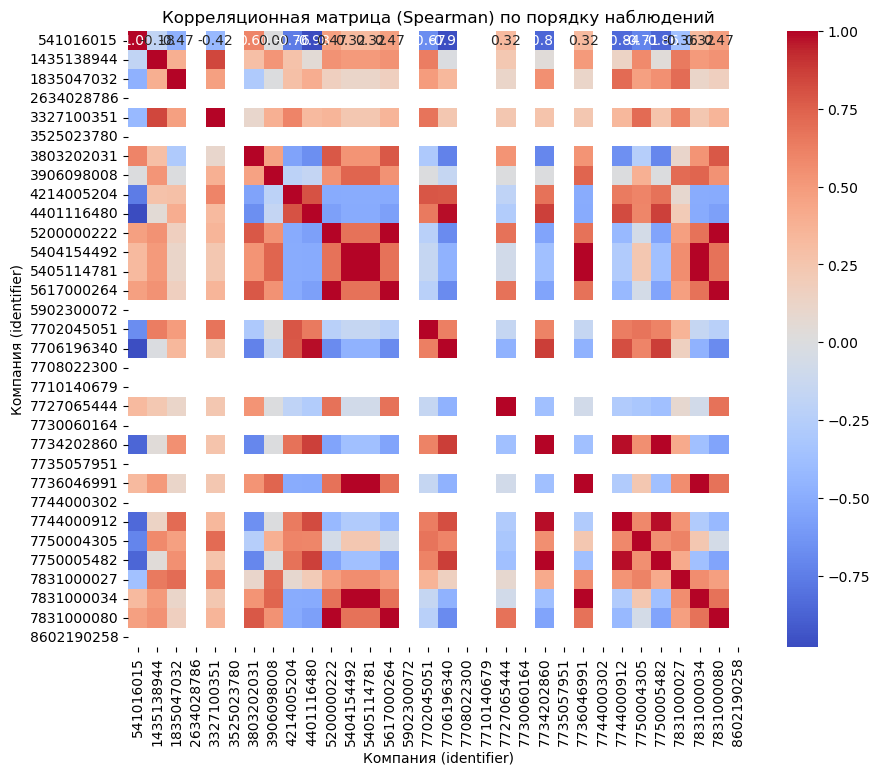

In [148]:
# Шаг 7. Визуализируем матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Корреляционная матрица (Spearman) по порядку наблюдений")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()

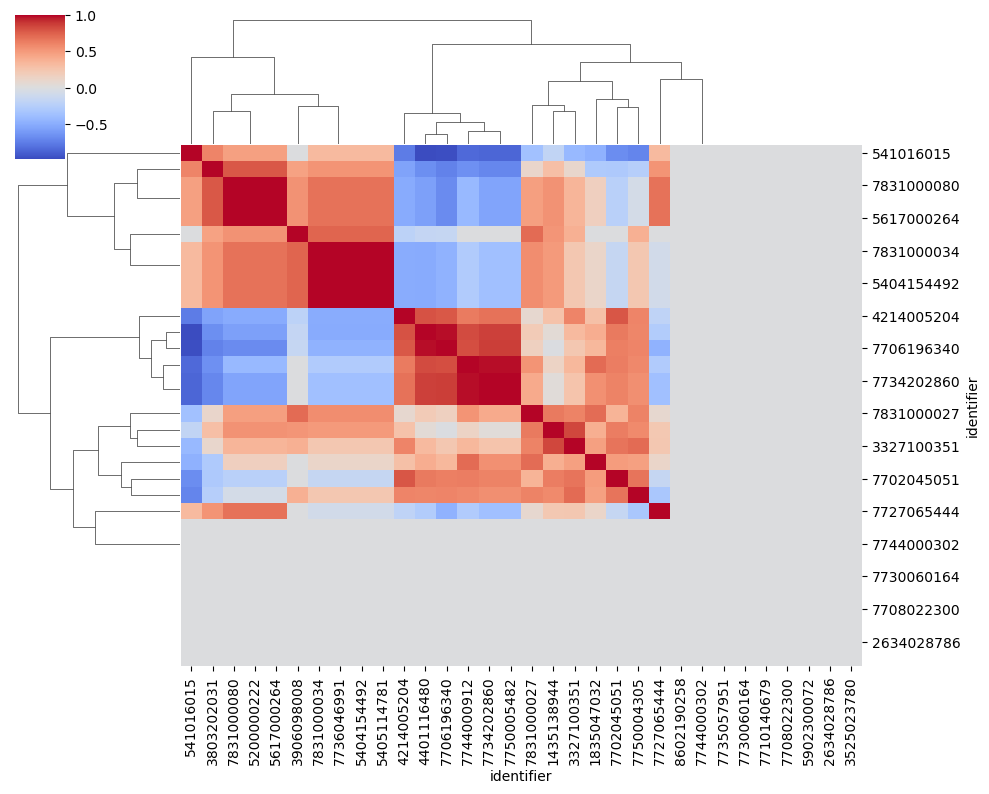

In [150]:
sns.clustermap(corr_matrix.fillna(0), cmap='coolwarm', figsize=(10, 8))
plt.show()

In [154]:
import math
# Шаг 2. Агрегируем данные по дате (если для одной компании в один день несколько значений, берём среднее)
df_agg = df.groupby(['identifier', '_date']).agg({
    'rating_num_cb': 'mean',
}).reset_index()

# Шаг 3. Отбираем компании с минимум 1 наблюдениями
counts = df_agg.groupby('identifier').size()
valid_companies = counts[counts >= 1].index
df_agg = df_agg[df_agg['identifier'].isin(valid_companies)]

# Шаг 4. Сортируем данные по идентификатору и дате и создаём порядковый номер наблюдения
df_agg = df_agg.sort_values(['identifier', '_date'])
df_agg['obs_num'] = df_agg.groupby('identifier').cumcount() + 1

# Шаг 5. Формируем сводную таблицу:
# строки — порядковый номер наблюдения, столбцы — identifier, значения — rating_num_cb
pivot_df = df_agg.pivot(index='obs_num', columns='identifier', values='rating_num_cb')

# Шаг 6. Вычисляем общий средний рейтинг (по всем наблюдениям) и округляем его в большую сторону
overall_mean = df_agg['rating_num_cb'].mean()
fill_value = math.ceil(overall_mean)

# Заполняем пустые ячейки этим значением
pivot_df = pivot_df.fillna(fill_value)

# Шаг 7. Рассчитываем корреляционную матрицу (Spearman)
corr_matrix = pivot_df.corr(method='spearman')

print("Корреляционная матрица (Spearman) для портфеля (без учета дат), пустые значения заменены общим средним (округленным вверх):")
print(corr_matrix)


Корреляционная матрица (Spearman) для портфеля (без учета дат), пустые значения заменены общим средним (округленным вверх):
identifier  106000547   274062111   276016368   411006129   541012405   \
identifier                                                               
106000547     1.000000    1.000000   -0.997037   -0.471405   -0.509175   
274062111     1.000000    1.000000   -0.997037   -0.471405   -0.509175   
276016368    -0.997037   -0.997037    1.000000    0.470008    0.507666   
411006129    -0.471405   -0.471405    0.470008    1.000000    0.720082   
541012405    -0.509175   -0.509175    0.507666    0.720082    1.000000   
...                ...         ...         ...         ...         ...   
7835905108   -0.508293   -0.508293    0.506787    0.718835    0.998268   
8602190258    0.258199    0.258199   -0.257434   -0.547723   -0.394405   
8622002375   -0.679366   -0.679366    0.620907    0.320256    0.345916   
9703077050    0.679366    0.679366   -0.620907   -0.320256   -

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


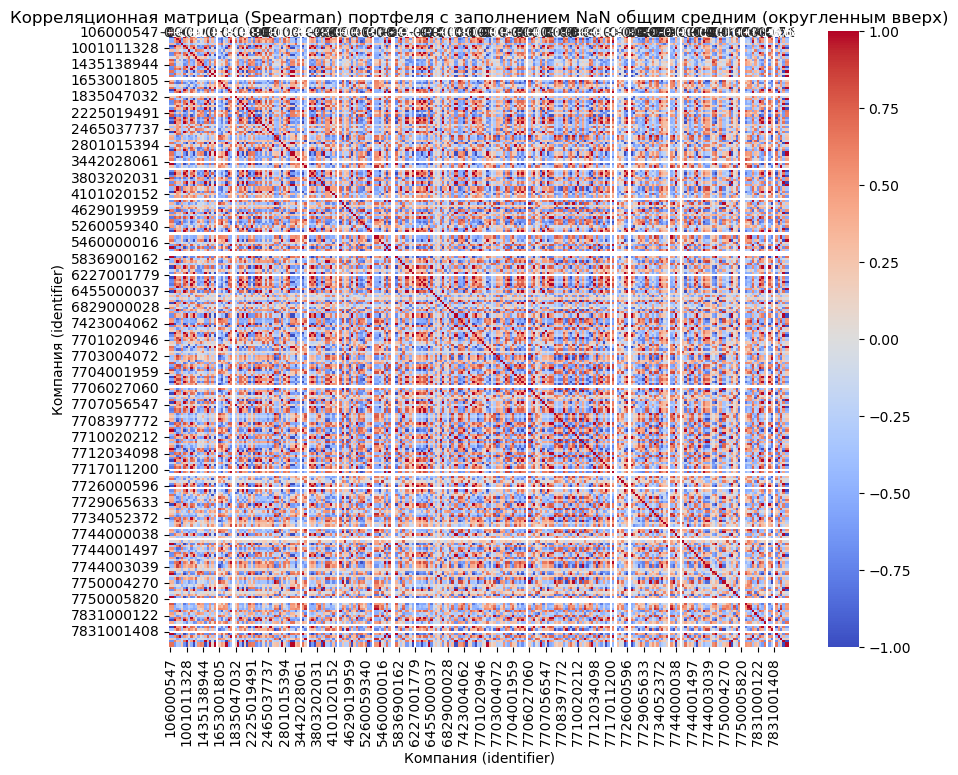

In [156]:
# Шаг 8. Визуализируем матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Корреляционная матрица (Spearman) портфеля с заполнением NaN общим средним (округленным вверх)")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


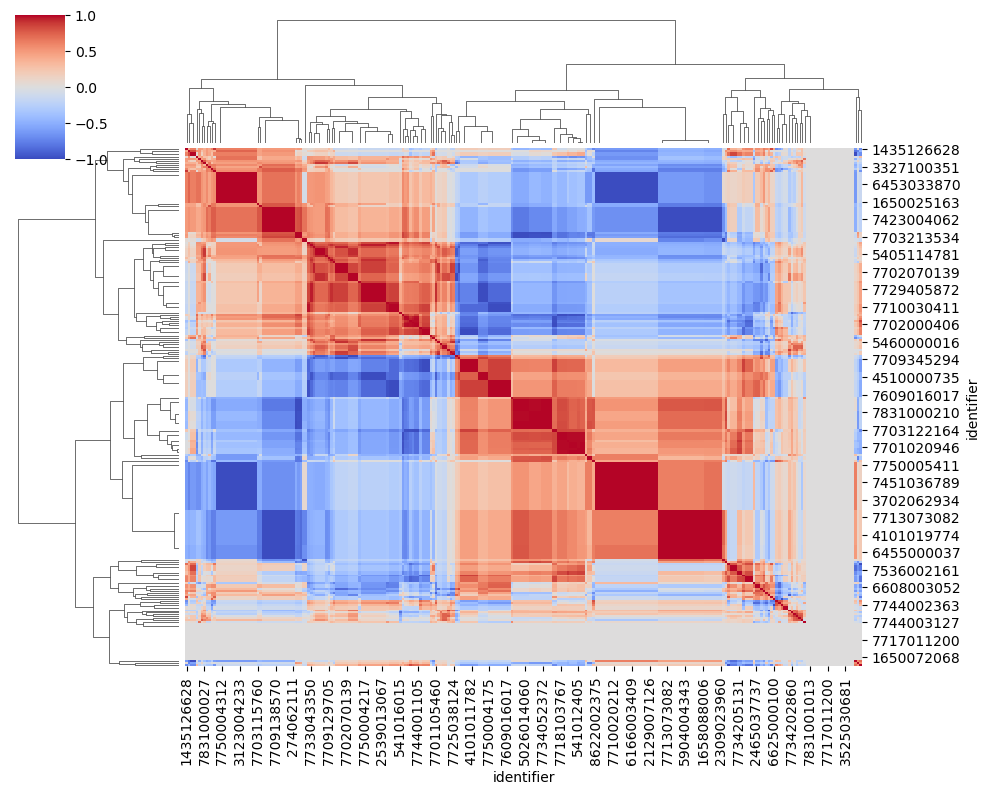

In [158]:
sns.clustermap(corr_matrix.fillna(0), cmap='coolwarm', figsize=(10, 8))
plt.show()

Если данных вообще нет - берем среднее выборки

In [161]:

# Шаг 2. Агрегируем данные по дате:
# Если для одной компании в один день несколько значений, берём среднее.
df_agg = df.groupby(['identifier', '_date']).agg({
    'rating_num_cb': 'mean',
    'agency': 'first',
    '_ro_type': 'first'
}).reset_index()

# Если требуется, можно отфильтровать компании, у которых есть хоть одно наблюдение.
# (Если компании вообще не встречаются в данных, они и так не попадут в агрегированную таблицу)

# Шаг 3. Вычисляем общий средний рейтинг по всей выборке и округляем в большую сторону.
global_mean = df_agg['rating_num_cb'].mean()
fill_value = math.ceil(global_mean)

# Шаг 4. Формируем сводную таблицу, где строки – это даты, столбцы – компании.
pivot_df = df_agg.pivot(index='_date', columns='identifier', values='rating_num_cb')

# Определяем общий диапазон дат (по дням) от минимальной до максимальной даты в выборке.
date_range = pd.date_range(start=pivot_df.index.min(), end=pivot_df.index.max(), freq='D')

# Приводим индексы pivot_df к этому диапазону, то есть создаём строку для каждого дня.
pivot_df = pivot_df.reindex(date_range)

# Шаг 5. Заполняем все пропуски (NaN) значением глобального среднего рейтинга (округлённым вверх)
pivot_df = pivot_df.fillna(fill_value)

# Для наглядности можно вывести первые строки полученной таблицы:
print("Сводная таблица (рейтинги по дням, пропуски заполнены глобальным средним):")
print(pivot_df.head())

# Дополнительно можно рассчитать корреляционную матрицу (например, Spearman) и построить тепловую карту.
corr_matrix = pivot_df.corr(method='spearman')

print("Корреляционная матрица (Spearman):")
print(corr_matrix)

Сводная таблица (рейтинги по дням, пропуски заполнены глобальным средним):
identifier  106000547   274062111   276016368   411006129   541012405   \
2015-04-30         4.0         4.0         4.0         4.0         4.0   
2015-05-01         4.0         4.0         4.0         4.0         4.0   
2015-05-02         4.0         4.0         4.0         4.0         4.0   
2015-05-03         4.0         4.0         4.0         4.0         4.0   
2015-05-04         4.0         4.0         4.0         4.0         4.0   

identifier  541016015   901001063   1001011328  1101300820  1102011300  ...  \
2015-04-30         4.0         4.0         4.0         4.0         4.0  ...   
2015-05-01         4.0         4.0         4.0         4.0         4.0  ...   
2015-05-02         4.0         4.0         4.0         4.0         4.0  ...   
2015-05-03         4.0         4.0         4.0         4.0         4.0  ...   
2015-05-04         4.0         4.0         4.0         4.0         4.0  ...   

ident

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


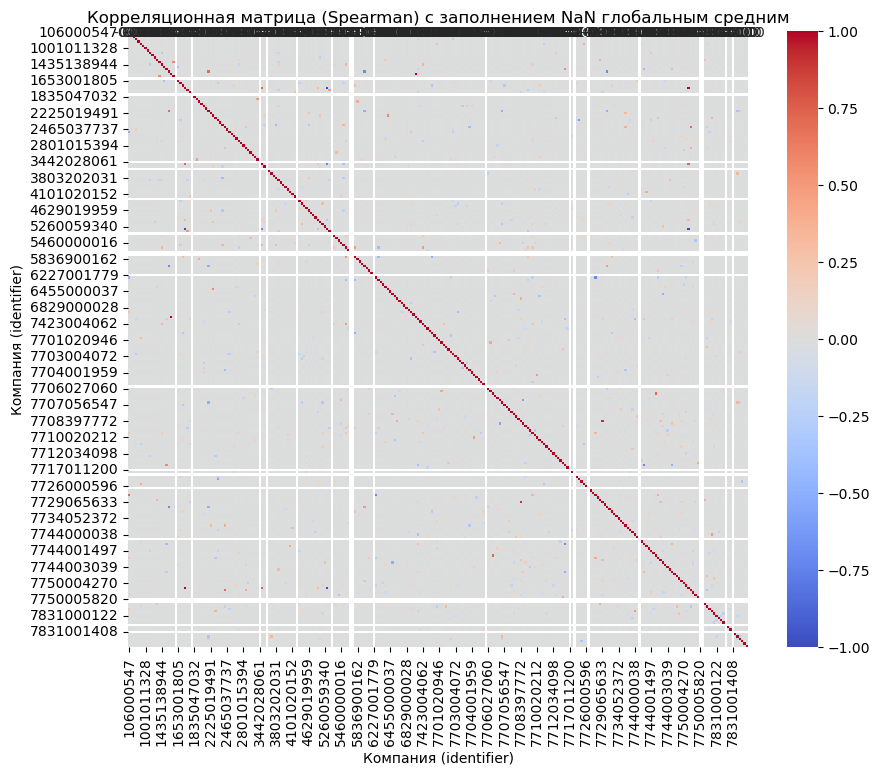

In [163]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Корреляционная матрица (Spearman) с заполнением NaN глобальным средним")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


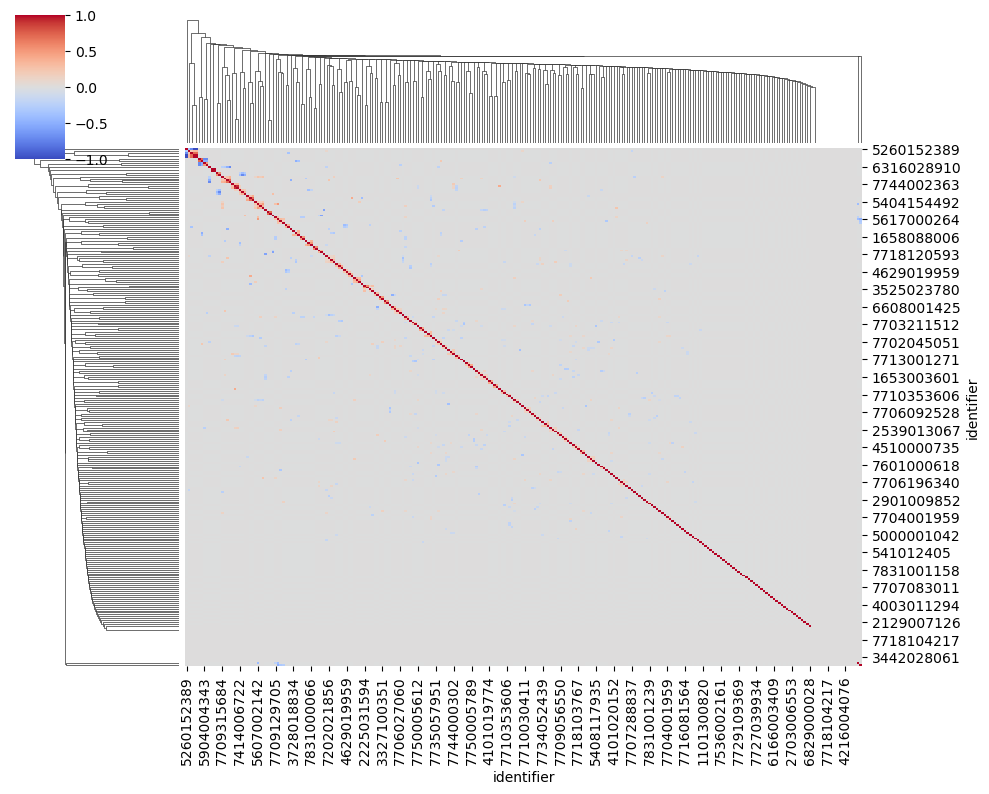

In [165]:
sns.clustermap(corr_matrix.fillna(0), cmap='coolwarm', figsize=(10, 8))
plt.show()

ВАРИАНТ 2

In [169]:
# Если для одной компании в один день несколько значений – берём среднее.
df_agg = df.groupby(['identifier', '_date']).agg({
    'rating_num_cb': 'mean',
    'agency': 'first',
    '_ro_type': 'first'
}).reset_index()

# Шаг 3. Создаём единый календарь по дням от минимальной до максимальной даты
global_date_range = pd.date_range(start=df_agg['_date'].min(), end=df_agg['_date'].max(), freq='D')

# Получаем список всех компаний (идентификаторов)
companies = df_agg['identifier'].unique()

# Создаём MultiIndex из всех комбинаций: каждая компания × каждый день
mi = pd.MultiIndex.from_product([companies, global_date_range], names=['identifier', '_date'])

# Формируем DataFrame с полным календарём
full_df = pd.DataFrame(index=mi).reset_index()

# Шаг 4. Объединяем исходные агрегированные данные с полным календарём по идентификатору и дате
merged_df = pd.merge(full_df, df_agg, on=['identifier', '_date'], how='left')

# Шаг 5. Вычисляем глобальное среднее по рейтингу (по всей выборке)
global_mean = merged_df['rating_num_cb'].mean()
fill_value = math.ceil(global_mean)

# Если в каком-либо дне у компании отсутствует значение, заполняем его глобальным средним (округлённым вверх)
merged_df['rating_num_cb'] = merged_df['rating_num_cb'].fillna(fill_value)

# Шаг 6. Строим сводную таблицу: строки – дата, столбцы – identifier, значения – rating_num_cb
pivot_df = merged_df.pivot(index='_date', columns='identifier', values='rating_num_cb')

# Для проверки можно вывести несколько первых строк
print("Сводная таблица (рейтинги по дням, пропуски заполнены глобальным средним):")
print(pivot_df.head())

# Шаг 7. Рассчитываем корреляционную матрицу (Spearman)
corr_matrix = pivot_df.corr(method='spearman')

print("Корреляционная матрица (Spearman) с заполнением пропусков глобальным средним:")
print(corr_matrix)

Сводная таблица (рейтинги по дням, пропуски заполнены глобальным средним):
identifier  106000547   274062111   276016368   411006129   541012405   \
_date                                                                    
2015-04-30         4.0         4.0         4.0         4.0         4.0   
2015-05-01         4.0         4.0         4.0         4.0         4.0   
2015-05-02         4.0         4.0         4.0         4.0         4.0   
2015-05-03         4.0         4.0         4.0         4.0         4.0   
2015-05-04         4.0         4.0         4.0         4.0         4.0   

identifier  541016015   901001063   1001011328  1101300820  1102011300  ...  \
_date                                                                   ...   
2015-04-30         4.0         4.0         4.0         4.0         4.0  ...   
2015-05-01         4.0         4.0         4.0         4.0         4.0  ...   
2015-05-02         4.0         4.0         4.0         4.0         4.0  ...   
2015-05-03 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


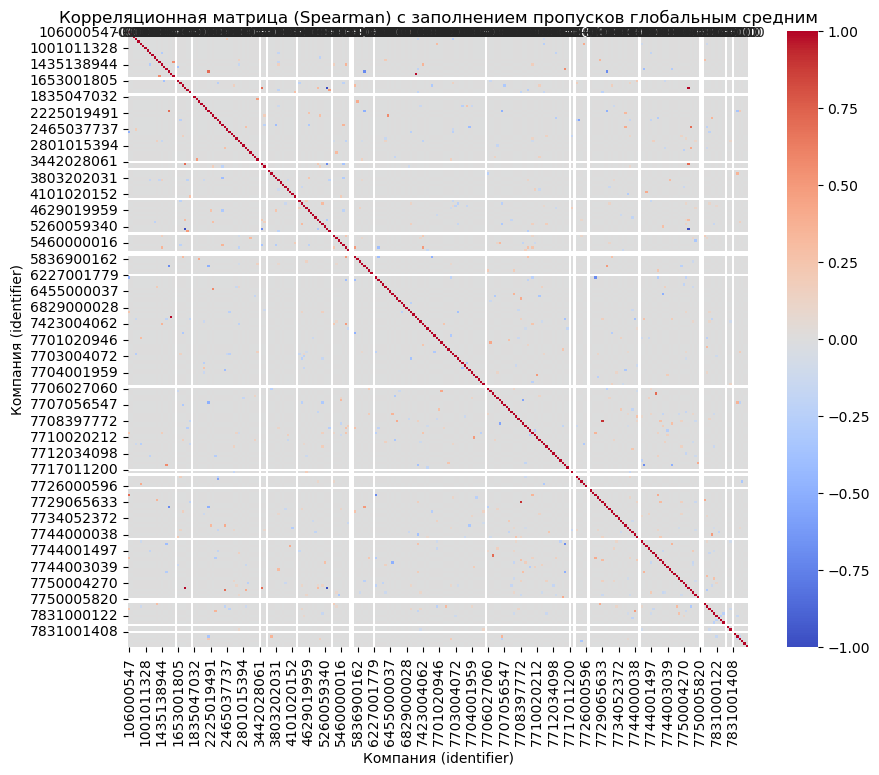

In [171]:
# Шаг 8. Визуализация: строим тепловую карту корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Корреляционная матрица (Spearman) с заполнением пропусков глобальным средним")
plt.xlabel("Компания (identifier)")
plt.ylabel("Компания (identifier)")
plt.show()